In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

# 데이터 소개

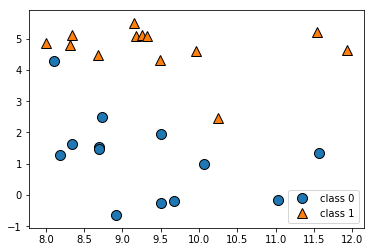

In [2]:
# 예제에 사용할 데이터 셋 (forge)
# 인위적으로 만든 이진 분류 데이터 셋
X,y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["class 0", "class 1"], loc=4)

Text(0.5,0,'attribute')

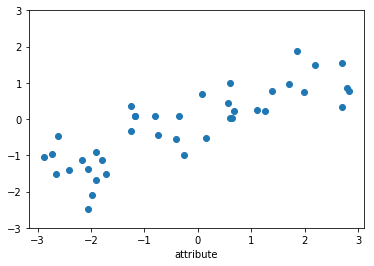

In [3]:
# 예제에 사용할 데이터 셋 (wave)
# 주로 회귀 알고리즘 설명에 사용함
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('attribute')

In [4]:
# 예제에 사용할 데이터 셋 (breast_cancer)
# 유방암 종양 데이터로, 종양은 양성, 음성으로 분류됨 (데이터 569개, 특성은 30개)
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys(): \n{}'.format(cancer.keys()))
print('sample count of each class: \n{}'.format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print('features: \n{}'.format(cancer.feature_names))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
sample count of each class: 
{'malignant': 212, 'benign': 357}
features: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
# 보스턴 주택 가격 데이터 (데이터 506개, 특성 13개)
# 특성에 수를 104개까지 늘릴 수 있음 (feature engineering)
from sklearn.datasets import load_boston
boston = load_boston()
print("{}".format(boston.data.shape))
X, y= mglearn.datasets.load_extended_boston()
print("{}".format(X.shape))

(506, 13)
(506, 104)


# 분류 모델 (k-최근접 이웃)

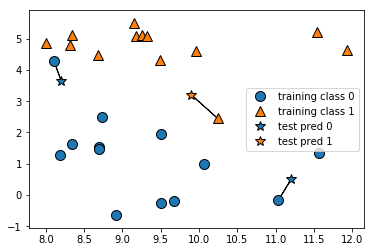

In [6]:
# K-최근접 이웃 분류 (mglearn)
mglearn.plots.plot_knn_classification(n_neighbors=1)

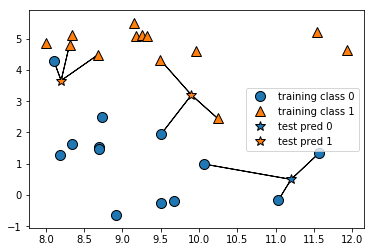

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [8]:
# forge 데이터
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)
print('X test: {}'.format(clf.predict(X_test)))
print("{:0.2f}".format(clf.score(X_test, y_test)))

X test: [1 0 1 0 1 0 0]
0.86


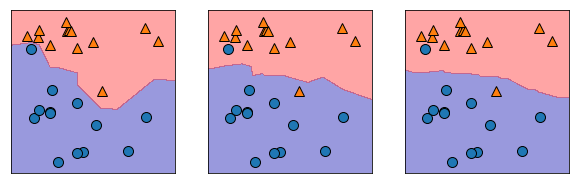

In [9]:
# K-최근접 이웃 분석 (파라미터 1,3,9)
# 파라미터가 작을수록 훈련 데이터에 적합한 모델을 만듦 (과적합)
# 파라미터가 커질수록 단순한 모델로 만듦 (일반화)
fig, axes = plt.subplots(1, 3, figsize=(10,3))
for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)

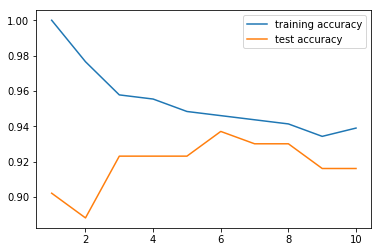

In [10]:
# 파라미터를 1~11로 조정
# 파라미터가 1개일 땐 모델을 너무 복잡하게 만들어 과적합
# 파라미터가 10개 일땐 모델을 너무 단순화 해서 정확도가 더 나빠짐 
# 파라미터 6일 때 테스트 정확도가 가장 좋은걸 보여줌 
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label='training accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.legend()

# 중요한 매개면수는 두 개
 # - 거리 계산 (대표적으로 유클리디안 거리)
 # - 이웃의 수
# k_NN은 이해하기 쉬우며, 간단한 모델이기에 복잡한 알고리즘을 적용하기 전에 시도할 수 있는 좋은 모델임
# 하지만, 데이터가 많으면 예측이 느리며, 특성(feature)이 많은 데이터 셋에는 잘 동작하지 못함 (데이터 전처리 과정이 중요함)
# 현업에서는 잘 쓰지 않음

# K-최근접 이웃은 회귀 분석도 가능함 (KNeighborsRegressor)

# 분류 모델 (선형 모델)

w[0]: 0.393906  b: -0.031804


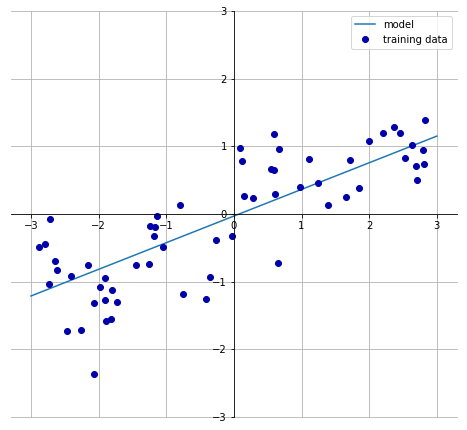

In [11]:
# training data들의 선형 모델을 만듦
mglearn.plots.plot_linear_regression_wave()

# K-nn과 비교했을 시 직선을 사용한 예측이 더 제약이 많아보이지만, feature가 많은 데이터 셋에 더 유리한 성능을 보임
# 선형 모델이 학습할 두 파라미터: w(기울기), b(y절편)

In [12]:
# 선형 회귀 모델
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
lr = LinearRegression().fit(X_train, y_train)

# 기울기(w) --> coef: 가중치 or 계수
# y절편 (b) --> intercept: 편향 or 절편
# intercept는 항상 실수 하나의 값, coef는 각 feature 당 대응되는 numpy 배열
print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept: {}'.format(lr.intercept_))
print('training set point {}'.format(lr.score(X_train, y_train)))
print('test set point {}'.format(lr.score(X_test, y_test)))
# 좋은 결과는 아니지만, training과 test의 값이 거의 유사함 (과소 적합)
# 1차원 데이터셋에서는 모델이 매우 단순해, 과대 적합에 대한 걱정은 없음

lr.coef_: [ 0.39390555]
lr.intercept: -0.031804343026759746
training set point 0.6700890315075756
test set point 0.65933685968637


In [13]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
lr = LinearRegression().fit(X_train, y_train)

print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept: {}'.format(lr.intercept_))
print('training set point {}'.format(lr.score(X_train, y_train)))
print('test set point {}'.format(lr.score(X_test, y_test)))
# feature의 수가 105개. 즉, 고차원 데이터 셋에선 선형 모델의 성능이 매우 높아져 과대 적합될 가능성이 높아짐
# 모델의 과대적합을 막기 위해, 복잡도를 제어할 수 있는 모델을 사용해야함 (Ridge)

lr.coef_: [ -4.75050668e+02   7.66248976e+00  -9.55383040e+01   1.33708435e+01
   3.77399151e+01   6.14571931e+01   3.45207050e+01  -1.20844469e+00
   2.89411288e+00   7.97381567e+01   1.39184091e+01   3.75868123e+01
  -2.73954567e+00   1.60075207e+01   6.71246566e+02   1.42025664e+03
   2.32122643e+02  -8.92062028e+01   6.87533012e+01  -4.98496442e+00
   5.87818767e+01   7.52035243e+02  -1.81075008e+03   5.21676580e+02
  -1.80410932e+01   1.00731434e+02  -4.26622200e+00  -1.21271166e+01
  -3.70329436e+00  -5.58361945e+01  -7.08769204e-02   8.51265643e+00
  -2.05278198e+01  -3.58234147e+01   4.25566751e+01  -3.35963152e+00
   1.13184946e+01  -3.25999376e+01   3.72859479e+01  -2.14650482e+00
   7.37428237e+00   4.88105086e+01   6.75839169e+00   4.21110920e+01
  -7.85387669e+00  -1.98976150e+00  -3.41928334e+00   3.34194555e+01
  -1.60278024e+01   1.33708435e+01  -1.80036506e+01  -2.86117967e+01
  -2.85803880e+00  -1.04759665e+01   1.25916205e+00  -1.47486907e+00
  -7.72662500e+00   5.87

In [14]:
# Ridge 모델
# 선형 회귀 모델은 feature가 많은 데이터 셋엔 과대적합이지만, Ridge는 덜 자유로운 모델이기에 과대적합이 줄어듦
# 선형 모델에 규제를 주어 과대적합이 되지 않도록 모델을 강제로 제한함 (L2 규제)
# 기본 파라미터 alpha = 1
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print('training set point {}'.format(ridge.score(X_train, y_train)))
print('test set point {}'.format(ridge.score(X_test, y_test)))

# 알파 값을 높이면 계수를 0에 더 가깝게 만들어 더욱 일반화 할 수 있음
ridge = Ridge(alpha=10).fit(X_train, y_train)
print('training set point {}'.format(ridge.score(X_train, y_train)))
print('test set point {}'.format(ridge.score(X_test, y_test)))

training set point 0.8703751958973932
test set point 0.8140998031853133
training set point 0.7670498825472767
test set point 0.7277573511985336


In [15]:
# Laso 모델
# 선형 회귀에 규제에 적용하는데 Ridge의 대안인 방법
# Ridge 회귀와 마찬가지로, 계수를 0에 가깝게 만드려고 함. (선형 모델의 규제를 위함)
# Laso 모델은 완전히 제외되는 특성이 생길 수 있음. 즉, feature selection이 자동으로 이뤄질 수 있음 (L1 규제)
# alpha 값을 너무 높이면, 규제가 심해지기 때문에 모델이 일반화가 심해짐 (과소 적합)
# alpha 값이 너무 낮으면, 규제가 없어저 모델이 복잡해집 (과대 적합)
from sklearn.linear_model import Lasso

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lasso = Lasso().fit(X_train, y_train)

print("{:.2f}".format(lasso.score(X_train, y_train)))
print("{:.2f}".format(lasso.score(X_test, y_test)))
print("using features:{}".format(np.sum(lasso.coef_ != 0)))

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print("{:.2f}".format(lasso001.score(X_train, y_train)))
print("{:.2f}".format(lasso001.score(X_test, y_test)))
print("using features:{}".format(np.sum(lasso001.coef_ != 0)))

lasso002 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print("{:.2f}".format(lasso002.score(X_train, y_train)))
print("{:.2f}".format(lasso002.score(X_test, y_test)))
print("using features:{}".format(np.sum(lasso002.coef_ != 0)))

# 실제 Ridge,Laso 중 Ridge를 좀 더 선호함. 하지만, 특성이 많고 그중 일부분만 중요하다면 Laso를 사용
# 또한, 분석하기 쉬운 모델을 만들고 싶다면 Laso (feature selection)
# scikit-learn은 이 둘의 장점을 조합한 ElasticNet도 제공함 

0.29
0.21
using features:4
0.90
0.77
using features:33
0.95
0.64
using features:94


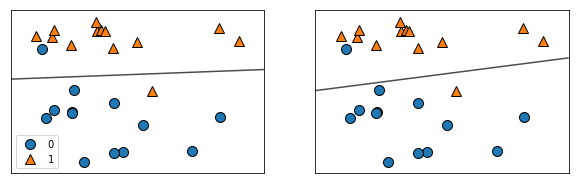

In [16]:
# 이진 분류형 선형 모델 (Logistic Regression, Support Vector Machine)
# 둘의 결과는 비슷. 두 모델은 기본적으로 L2 규제를 사용함
# 규제의 강도를 결정하는 것은 파라미터 C
# C가 높아지면 규제가 감소, C가 낮아지면 규제가 심해짐
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
axes[0].legend()

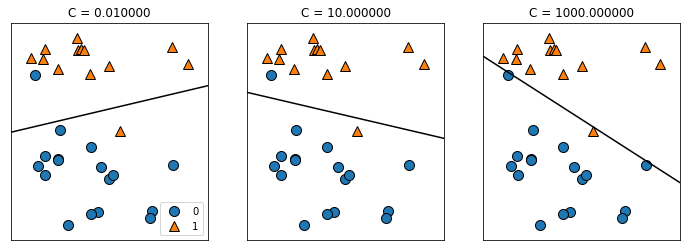

In [17]:
mglearn.plots.plot_linear_svc_regularization()

In [18]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target ,stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("training set point {}".format(logreg.score(X_train, y_train)))
print("test set point {}".format(logreg.score(X_test, y_test)))
# 성능은 매우 좋지만, 훈련, 테스트셋이 매우 비슷해 과소 적합으로 보임

logreg = LogisticRegression(C=100).fit(X_train, y_train)
print("training set point {}".format(logreg.score(X_train, y_train)))
print("test set point {}".format(logreg.score(X_test, y_test)))
# 파라미터 조절을 통해 과소 적합을 해소할 수 있음

training set point 0.9530516431924883
test set point 0.958041958041958
training set point 0.971830985915493
test set point 0.965034965034965


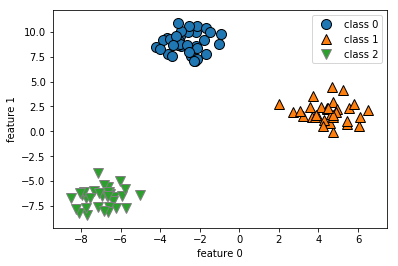

In [19]:
# 다중 클래스 분류용 선형 모델
# 로지스틱 회귀를 제외하고, 대부분의 선형 모델은 이진 분류만 지원함.
# 그래서, 이진 분류 방법을 다중 클래스 분류 방법으로 확장하는 일대다 방법을 사용함
# 클래스의 수 만큼 이진 분류 모델을 만드는 것 (여기선 3개)
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 2'])

coef{} (3, 2)
intercept{} (3,)


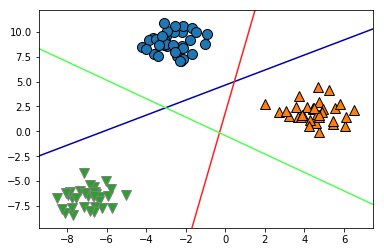

In [20]:
linear_svm = LinearSVC().fit(X, y)
print('coef{}', linear_svm.coef_.shape)
print('intercept{}', linear_svm.intercept_.shape)

mglearn.discrete_scatter(X[:,0],X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
# 정가운데 있는 데이터는 가장 직선에 가까운 클래스로 구분이 됨
# 세 개의 일대다 분류기가 만든 다중 클래스
# 마찬가지로 C 값이 작을수록 모델을 단순화 할 수 있음.
# L1, L2 규제를 사용할지 정해야 함. 중요한 feature가 많지 않다고 생각하면 L1 규제를 사용
# 그렇지 않다면, 기본적으로 L2 규제를 이용함

# 선형 모델의 장점
# 1. 학습 속도가 빠르고, 예측도 빠르다. 
# 2. 매우 큰 데이터 셋과 희소환 데이터 셋에도 잘 동작하며 예측이 어떻게 만들어지는지 쉽게 이해할 수 있음
# 3. feature가 많은 경우 선형 모델을 많이 사용하지만, 저차원의 데이터셋에서는 다른 모델들의 일반화 성능이 더 높음 (즉, 저차원 데이터 셋엔 일반화 성능이 떨어짐)

# 나이브 베이즈 분류

In [21]:
# 나이브 베이즈는 선형 모델과 매우 유사함
# 로지스틱 회귀, LinearSVC와 같은 선형 분류기보다 훈련 속도는 빠르지만, 일반화 성능이 조금 뒤짐
# 나이브 베이즈는 각 feature를 개별로 취급해 파라미터를 학습하고 각 특성에서 클래스별 통계를 단순하게 취합함 (장점)
# GaussianNB 연속적인 데이터에 적용, BernoulliNB 이진 데이터, MultinomialNB 카운트 데이터

# 나이브 베이즈 모델은 선형 모델의 장단점은 비슷함. 하지만, 선형 모델로 학습 시간이 오래 걸리는 매우 큰 데이터셋은 나이브 베이즈 모델로 종종 사용됨
# (선형 모델도 학습 속도가 빠르지만, 나이브 베이즈는 좀 더 빠름?)

# 결정 트리 분류/회귀

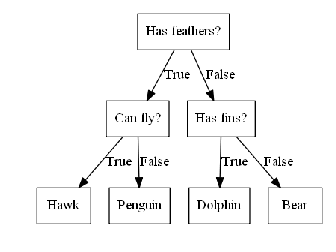

In [22]:
# 결정 트리는 예/아니오 질문을 이어나가며 학습함
mglearn.plots.plot_animal_tree()

In [23]:
# 데이터를 분할하는 것은 각 분할된 영역이 한개의 타깃값(하나의 클래스)를 가질 때 까지 반복함.
# 여기서 타깃 하나로만 이루어진 노드를 순수 노드라 함
# 결정 트리는 모든 노드를 순수 노드로 만들 때 까지, 학습을 진행함 (즉, 모델이 매우 복잡해짐 - 과대적합)

# 결정 트리에서 과대 적합을 막는 전략 2가지
# 1. 트리 생성을 일찍 중단 하는 전략 (사전 가지치기) --> 트리의 최대 깊이, 리프의 최대 개수를 제한
# 2. 트리를 만든 후 데이터 포인트가 적은 노드를 삭제, 병합 (사후 가지치기)
# scikit-learn에선 사전 가지치기만 제공함
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print("training set point {}".format(tree.score(X_train, y_train)))
print("test set point {}".format(tree.score(X_test, y_test)))

# 가치 치기를 통해 일반화 할 수 있음
# 가치 치기를 안하면, 모든 노드가 순수 노드가 될 때까지 노드를 분할하기 때문에, 과대적합이 됨
tree = DecisionTreeClassifier(max_depth=4, random_state = 0)
tree.fit(X_train, y_train)
print("training set point {}".format(tree.score(X_train, y_train)))
print("test set point {}".format(tree.score(X_test, y_test)))

training set point 1.0
test set point 0.9370629370629371
training set point 0.9882629107981221
test set point 0.951048951048951


feature importance [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01063382  0.0504697   0.          0.
  0.          0.          0.          0.          0.          0.
  0.75793681  0.03465357  0.          0.          0.          0.
  0.01896644  0.12733965  0.          0.        ]


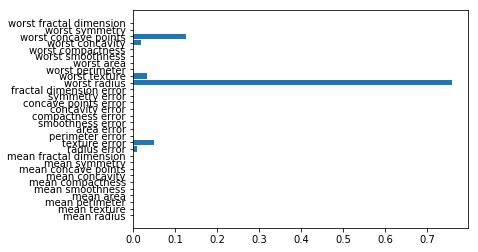

In [24]:
# 특성의 중요도를 나타낼 수 있음 (feature importance)
# 여기선 worst radius가 두 클래스를 잘 나누고 있는 것을 나타냄 
# (1에 가까울 수록 완벽하게 타깃 클래스를 예측한다는 의미, 0에 가까울 수록 전혀 사용되지 않았음)
# 하지만, 값이 낮다고해서 feature가 유용하지 않다는 것은 아님. 단지 생성한 트리가 그 특성을 선택하지 않은 것
# 또한, worst radius는 중요하다고 알려주지만, 높은 radius값이 class 1,0 인지 알 수 없음. 
# 즉 특성의 중요도가 어떤 클래스를 지지하는지는 알려주지 않음
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
tree = DecisionTreeClassifier(max_depth=3, random_state = 0)
tree.fit(X_train, y_train)
print("feature importance {}".format(tree.feature_importances_))
plot_feature_importances_cancer(tree)

Feature importances: [ 0.  1.]


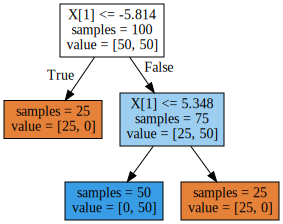

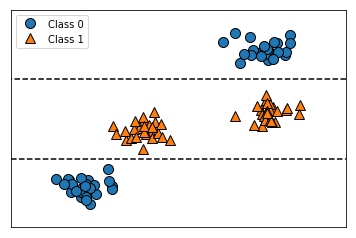

In [25]:
# feature와 class 사이에 관계
# 두 종류의 feature가 있을 때, 여기서 X[1]만으로 class를 구분할 수 있음. X[0]은 사용하지 않음
# 하지만, X[1]이 높으면 class 0, 낮으면 1이라고도 말할 수 없음
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

# 트리 모델의 장점
# 1. 만들어진 모델을 쉽게 시각화해 비전문가도 쉽게 이해할 수 있음 (비교적 작은 트리)
# 2. 데이터 스케일에 구애받지 않음 (feature의 정규화, 표준화 같은 전처리 과정이 필요 없음)
# 트리 모델의 단점
# 1. 사전 가지치기를 사용함에도 과대적합하는 경향이 있어, 일반화 성능이 좋지 않음. 그래서 이를 해결하기 위해 앙상블 방법을 이용함

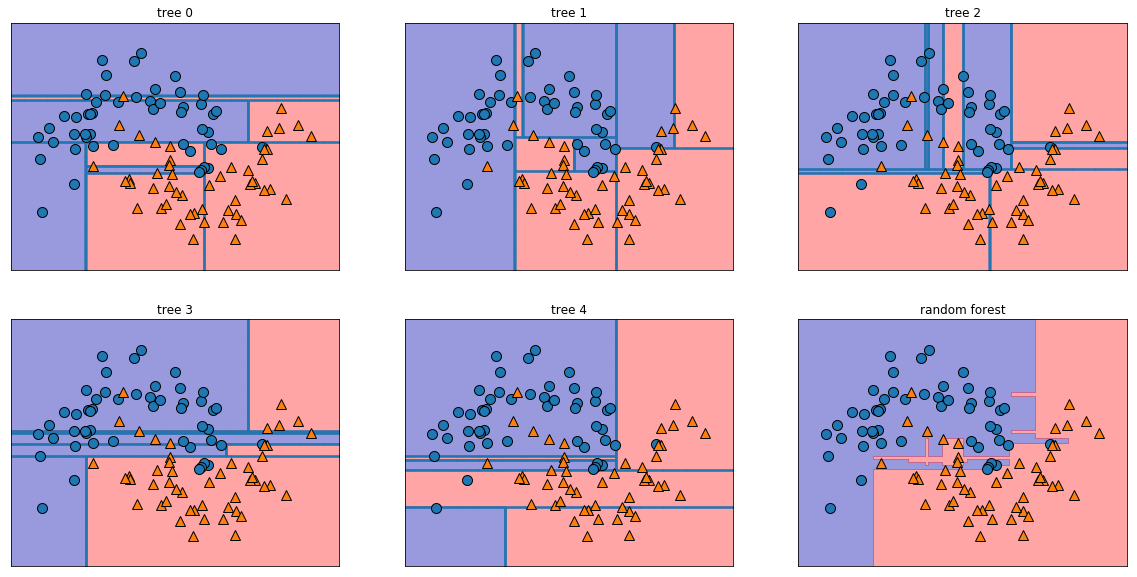

In [26]:
# 랜덤 포레스트, 그래디언트 부스팅
# 랜덤 포레스트는 서로 다른 방향으로 과대적합된 트리를 많이 만들어, 그결과를 평균냄으로써 과대적합된 양을 줄일 수 있음
# 트리 모델의 예측 성능이 유지되면서 과대적합이 줄어드는 것
# 동작 방식
# 1. 트리의 개수를 정함
# 2. 서로 다른 트리를 만들기 위해, 부트스트랩 샘플을 생성함 (부트스트랩 샘플은 무작위로 데이터를 n_sample 횟수만큼 반복 추출함)
# [a,b,c,d]를 부트스트랩 샘플로 만들시, [b,d,d,c], [d,a,d,a] 등 여러 형태로 무작위로 만듦
# 3.몇 개의 feature를 사용할지 max_feature를 통해 조절함. 또한, 각 분기마다 각기 다른 특성 부분 집합을 사용함
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

fig, axes = plt.subplots(2, 3, figsize=(20,10))

# 만들어진 tree는 .estimators_에 들어있음
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title('random forest')
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# 랜덤 포레스트는 개개의 트리보다 덜 과대적합하며 훨씬 좋은 결정 경계를 만듦
# 실제 매우 많은 트리를 이용(수백, 수천개)하면, 더 부드러운 결정 경계를 만들 수 있음

In [27]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
#forest = RandomForestClassifier(n_estimators=100, random_state=0, max_depth = 4, max_features = 30)
forest.fit(X_train, y_train)
print("training set point {}".format(forest.score(X_train, y_train)))
print("test set point {}".format(forest.score(X_test, y_test)))

training set point 1.0
test set point 0.972027972027972


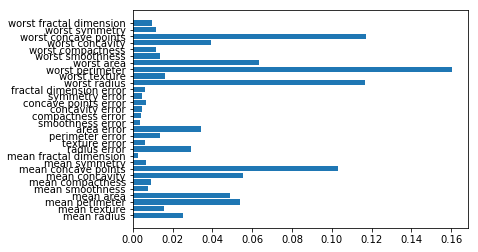

In [28]:
# 랜덤 포레스트의 feature 중요도는 트리의 특성 중요도를 취합해 계산한 것.
# 트리 하나보다 더 신뢰할 수 있음
# 사용 파라미터, n_estimators, max_featurues, max_depth
plot_feature_importances_cancer(forest)

# 랜덤 프로세트의 장점
# 1. 회귀 분류에 있어서 가장 많이 사용하는 머신러닝 알고리즘. 성능이 매우 뛰어나며 파라미터 튜닝도 많이 하지 않아도 됨
# 2. 트리가 가지는 단점을 보완하며, 장점은 그대로 가짐
# 단점은?
# 1. 텍스트 데이터 같이 매우 차원이 높고 희소한 데이터에는 잘 동작하지 못함. 이런 것은 선형 모델이 더 적합함
# 2. 속도가 선형 모델보다 느림 (훈련, 예측). 즉, 속도와 메모리 사용이 제약적인 어플리케이션에선 선형 모델이 더 적합함

In [29]:
# 그래디언트 부스팅 회귀 트리
# 랜덤 프로세트와 다르게, 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만듦. 즉, 무작위로 트리를 여러개 만드는게 아님
# 보통, 다섯 정도의 깊지 않은 트리를 사용하므로 메모리를 적게 사용해 예측이 빠름
# 핵심 아이디어는, 얕은 트리 모델을 많이 연결하는 것
# 랜덤 포레트스보다 매개변수 설정이 좀더 민감하지만, 잘 조정하면 더 높은 정확도를 제공함

# 사용 파라미터: learning_rate (이전 트리의 오차를 얼마나 강하게 보장할 것인지)
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

forest = GradientBoostingClassifier(random_state=0)
forest.fit(X_train, y_train)
print("training set point {}".format(forest.score(X_train, y_train)))
print("test set point {}".format(forest.score(X_test, y_test)))

forest = GradientBoostingClassifier(random_state=0, max_depth=1)
forest.fit(X_train, y_train)
print("training set point {}".format(forest.score(X_train, y_train)))
print("test set point {}".format(forest.score(X_test, y_test)))

forest = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
forest.fit(X_train, y_train)
print("training set point {}".format(forest.score(X_train, y_train)))
print("test set point {}".format(forest.score(X_test, y_test)))

# 파라미터를 조절함으로써, 모델의 복잡도를 줄일 수 있음
# 보통 랜덤포레스트를 먼저 적용 후, 예측 시간이 중요하거나 머신러닝 모델에서 마지막 성능까지 쥐어짜야할 때, 그래디언트 부스팅을 이용함
# 장단점은 랜덤프로스트와 비슷함 (마찬가지로, 고차원 희소한 데이터에 잘 동작x)

training set point 1.0
test set point 0.958041958041958
training set point 0.9906103286384976
test set point 0.972027972027972
training set point 0.9882629107981221
test set point 0.965034965034965


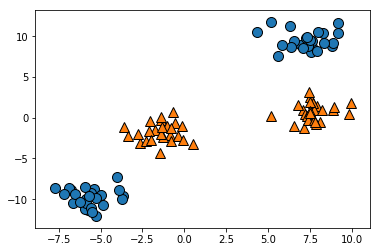

In [87]:
# 커널 서포트 벡터 머신
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:,0], X[:, 1], y)

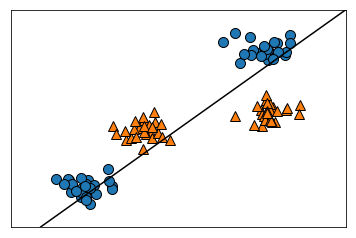

In [88]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svc, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
# 분류를 위한 선형 모델은 직선으로만 데이터 포인트를 나누기 때문에 잘 들어맞지 못함

Text(0.5,0,'feature1 ** 2')

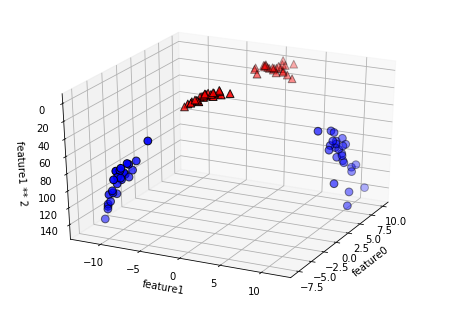

In [90]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Text(0.5,0,'feature1 ** 2')

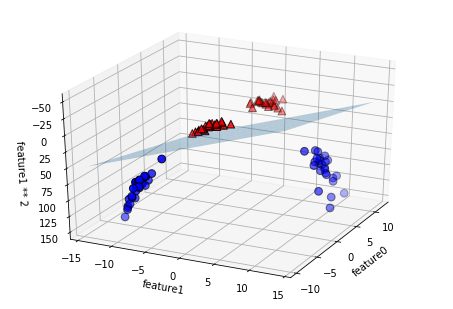

In [91]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

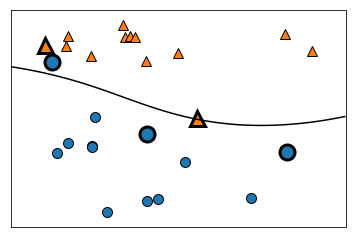

In [37]:
# 커널 기법
# 앞서 본것 처럼, 데이터셋에 비선형 특성을 추가해 선형 모델을 강력하게 만들었음. 하지만, 특성이 많이 추가되면 연산 비용이 커질 것
# 새로운 특성을 만들지 않고도 고차원에서 분류기를 학습할 수 있음

# 서포츠 벡터 머신에서 데이터를 고차원 공간에 매핑하는 데 두 가지를 많이 사용함
# 1. 다항식 커널, 2. 가우시안 커널(차원이 무한한 특성 공간에 매핑) or RBF 커널

# SVM
# SVM은 학습하면서 두 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지 학습함
# 일반적으로 훈련 데이터의 일부만 결정 경계를 만듦. 두 클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터라 함
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
# 파라미터는 C, gamma 값을 이용함
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

sv = svm.support_vectors_

sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
# rbf 커널을 이용한 svm은 비선형 경계를 만들 수 있음

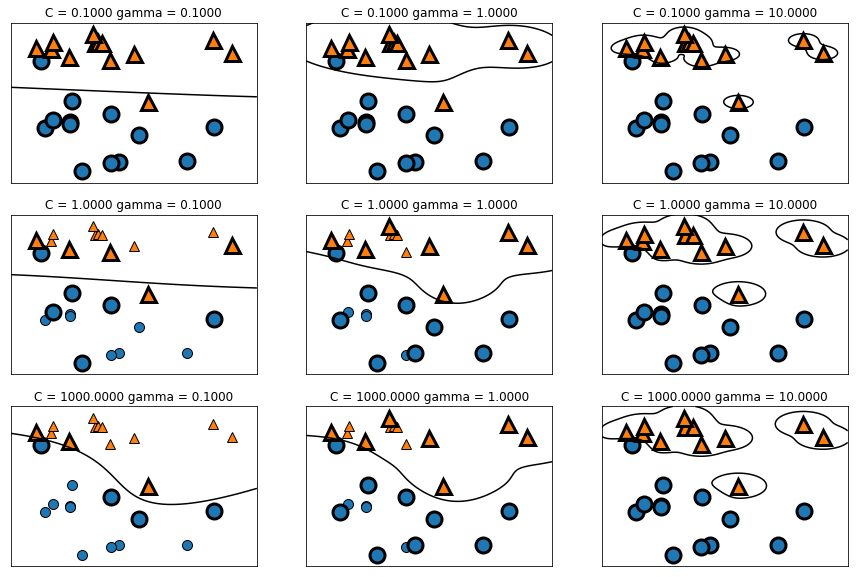

In [38]:
fig, axes = plt.subplots(3, 3, figsize=(15,10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
# gamma 값이 높을수록 복잡한 모델을 만듦
# 규제의 강도를 결정하는 것은 파라미터 C (C가 높아지면 규제가 감소(과적합), C가 낮아지면 규제가 심해짐(일반화))

1.0
0.6293706293706294


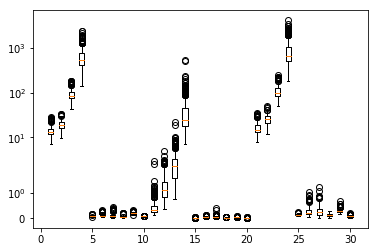

In [42]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
svc = SVC()
svc.fit(X_train, y_train)

print("{}".format(svc.score(X_train, y_train)))
print("{}".format(svc.score(X_test, y_test)))
# 유방암 데이터는 과대적합 되었음
# 매개 변수 설정, 데이터 스케일에 매우 민감함
# 입력 특성의 범위가 비슷해야 함

plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
# 각 특성별 자릿수 자체가 완전히 다름.
# 일부 모델에서도 어느정도 문제가 될 수 있지만, SVM에서는 영향이 큼

In [52]:
# 전처리 과정이 중요함
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)

X_train_scaled = (X_train - min_on_training) / range_on_training
print("{}".format(X_train_scaled.min(axis=0)))
print("{}".format(X_train_scaled.max(axis=0)))
X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train)
print("{}".format(svc.score(X_train_scaled, y_train)))
print("{}".format(svc.score(X_test_scaled, y_test)))

# 과소적합을 막기 위해 C값을 높임
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("{}".format(svc.score(X_train_scaled, y_train)))
print("{}".format(svc.score(X_test_scaled, y_test)))

# SVM의 장점
# 1. 다양한 데이터셋에서 잘 동작함. 또한, 데이터의 특성이 몇 개 안되더라도 복장한 결정 경계를 만듦
# 단점
# 1. 샘플이 많을 때는 잘 동작하지 않음 (속도, 메모리 관점)
# 2. 전처리와 매개 변수 설정에 신경을 써야함
# 그래서 대부분, 랜덤 포레스트, 그래디언트 부스팅을 많이 사용함

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
0.9483568075117371
0.951048951048951
0.9882629107981221
0.972027972027972


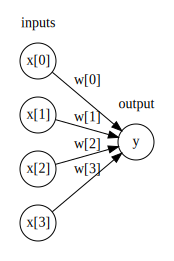

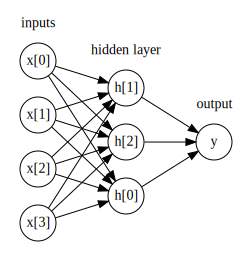

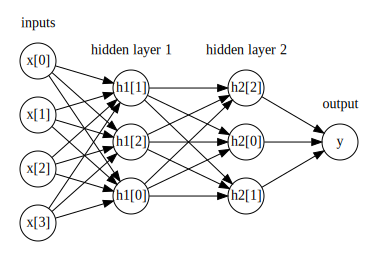

In [60]:
# 신경망(딥러닝)
display(mglearn.plots.plot_logistic_regression_graph())
display(mglearn.plots.plot_single_hidden_layer_graph())
mglearn.plots.plot_two_hidden_layer_graph()
# 신경망은 노드 사이의 가중치 값을 학습함
# 은닉층이 많이 구성된 대규모의 신경망 --> 딥러닝

Text(0,0.5,'relu(x), tanh(x)')

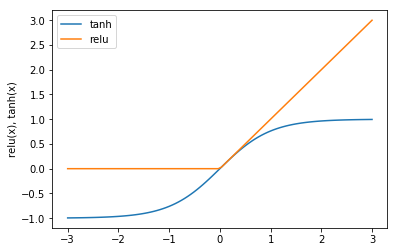

In [59]:
# 각 노드의 가중치 합을 계산 후, 그 결과를 비선형 함수 (렐루, 하이퍼 볼릭 탄젠트)를 적용함
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc='best')
plt.ylabel("relu(x), tanh(x)") 

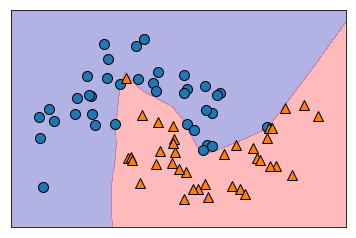

In [63]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
# 다중 퍼셉트론 MLPClassifier를 이용
# 은닉층은 1개, 은닉 유닛은 100개인 신경망 (디폴트)
# 최적화 알고리즘 lbfgs

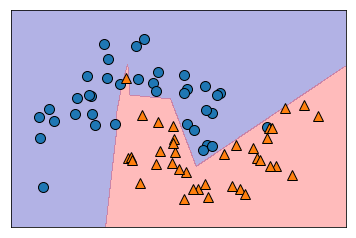

In [64]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
# 은닉 유닛의 수를 줄임으로써 모델의 복잡도는 낮아지며, 여전히 좋은 결과를 보여줌
# 더 매끄러운 결정 경계를 원한다면, 1. 은닉 유닛을 추가, 2. 은닉층을 추가, 3. tanh 함수를 사용함

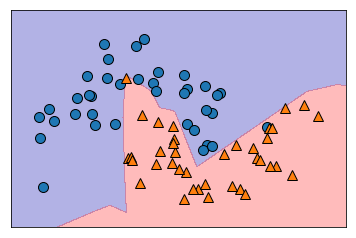

In [65]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
# 은닉 층의 수를 10, 은닉 유닛의 수를 10으로

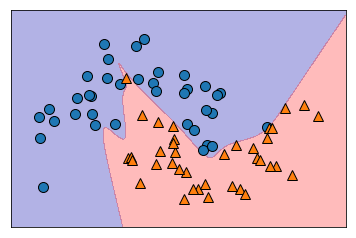

In [66]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10], activation='tanh').fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
# tahn 활성화 함수를 사용

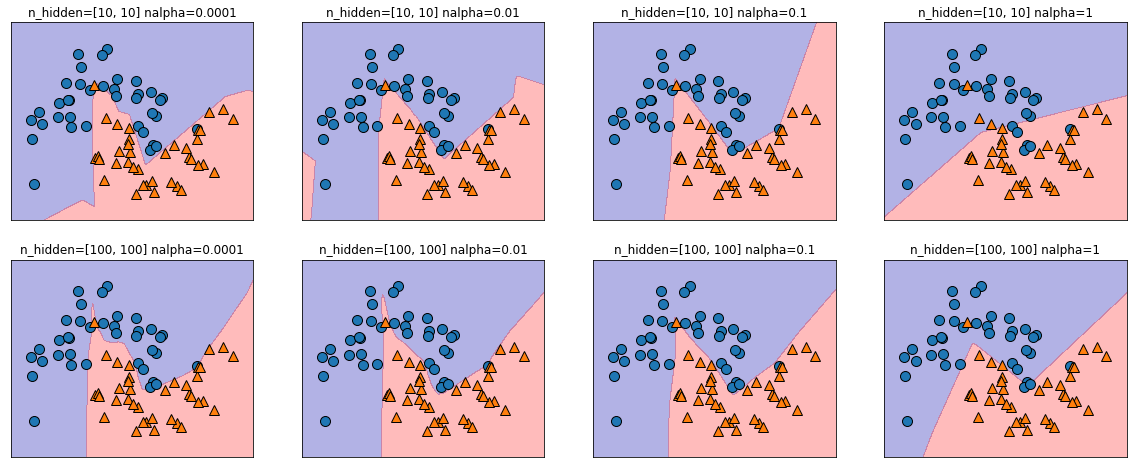

In [68]:
# 복잡도 (은닉 층, 은닉 유닛 수, alpha)
fig, axes = plt.subplots(2, 4, figsize=(20,8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip (axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha).fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}] nalpha={}".format(n_hidden_nodes, n_hidden_nodes, alpha))
# alpha 는 규제를 줄 수 있음

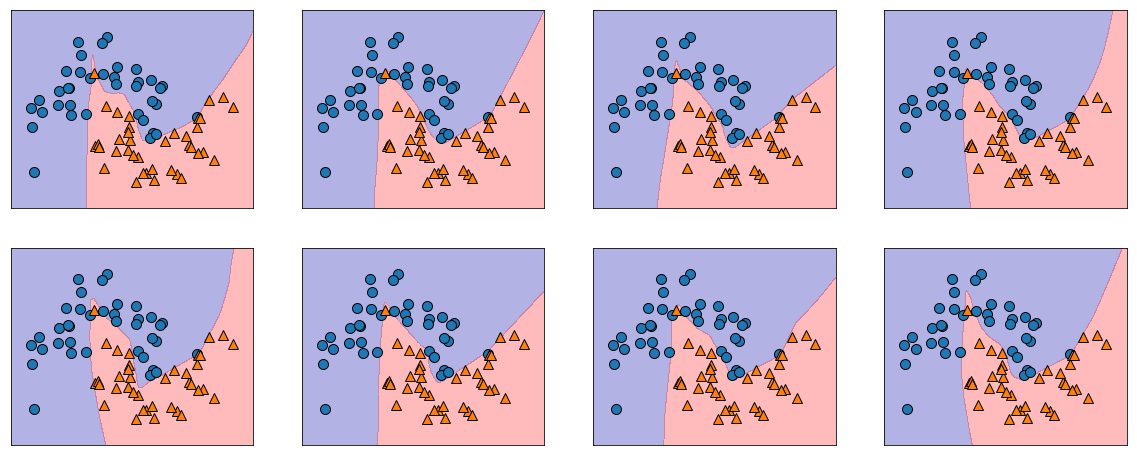

In [70]:
# 신경망의 가중치 값의 초기값은 랜덤이기 때문에, 특히 작은 신경망일 땐 다른 모델을 만듦. 하지만, 큰 신경망은 정확도에 큰 영향을 끼치지 않음
# 매개변수는 똑같이 하고, 랜덤 값만 다르게 할 경우
fig, axes = plt.subplots(2, 4, figsize=(20,8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100]).fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("{}".format(mlp.score(X_train, y_train)))
print("{}".format(mlp.score(X_test, y_test)))
# SVM은 데이터 스케일이 영향을 끼친것처럼, 신경망도 모든 입력 특성을 평균은 0, 분산은 1이되도록 변형하는 것이 좋음
# 이를 자동으로 해주는 StandardScaler (3장)

0.9061032863849765
0.8811188811188811


In [78]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(max_iter=1000,random_state=0)
mlp.fit(X_train_scaled, y_train)
print("{}".format(mlp.score(X_train_scaled, y_train)))
print("{}".format(mlp.score(X_test_scaled, y_test)))

# alpha 값은 0.0001(아주 작음) ~ 1(아주크게) - alpha가 1이면 규제가 심하기 때문에, 일반화 모델을 생성함
mlp = MLPClassifier(max_iter=1000,random_state=0, alpha=1)
mlp.fit(X_train_scaled, y_train)
print("{}".format(mlp.score(X_train_scaled, y_train)))
print("{}".format(mlp.score(X_test_scaled, y_test)))

0.9929577464788732
0.972027972027972
0.9882629107981221
0.972027972027972


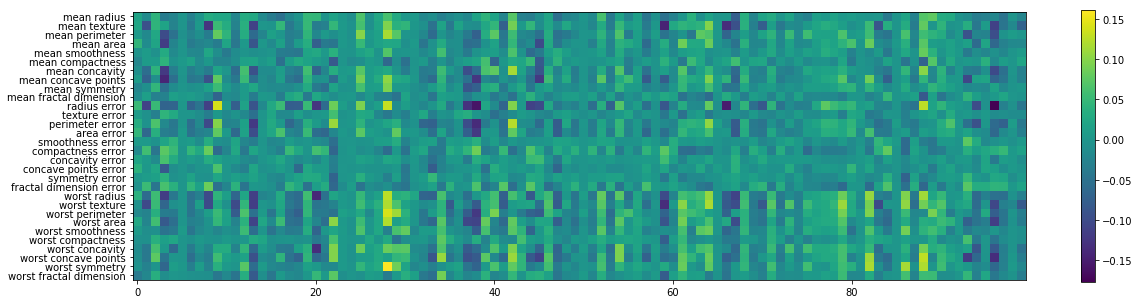

In [79]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.colorbar()
# 입력, 은닉층 사이의 학습된 가중치를 보여줌
# 밝은색은 큰 양수, 어두운 색은 음수 값을 나타냄
# 가중치를 시각화할 수 있지만, 해석하긴 어려움

# 신경망의 장점
# 1. 대량의 데이터에 내재된 정보를 잡아내고 매우 복잡한 모델을 만들 수 있음
# 2. 충분한 연산 시간, 데이터를 주고 매개변수를 세심하게 조정하면 신경망은 다른 머신러닝 알고리즘보다 훨씬 좋은 성능을 보임
# 단점
# 1. 학습이 오래 걸림
# 2. 전처리에 주의해야 함
# 3. 매개변수 튜닝이 어려움

# 신경망에서 매개변수를 조정하는 방법은, 일단 충분히 과대적합되어 문제를 해결할만한 큰 모델을 만듦
# 훈련 데이터가 충분히 학습될 수 있다고 생각될 때, 신경망 구조를 줄이거나 규제 강화를 위해 alpha 값을 증가시키며 일반화 성능을 향상시킴

In [ ]:
# 정리
# 1. 최근접 이웃
# - 작은 데이터 셋일 경우, 기본 모델로서 좋고 설명하기 쉬움
# 2. 선형 모델
# - 첫번째로 시도할 알고리즘, 대용량 데이터셋 가능, 고차원 데이터에 가능
# 3. 나이즈 베이즈
# - 분류만 가능. 선형모델보다 훨씬 빠름. 대용량 데이터 셋 가능, 고차원 데이터에 가능, 선형모델보다 덜 정확함
# 4. 결정 트리
# - 매우 빠름. 데이터 스케일 조정이 필요 없음. 시각화하기 좋고 설명하기 쉬움
# 5. 랜덤 포레스트
# - 결정 트리 하나보다 거의 항상 좋은 성능을 냄. 매우 안정적이고 강력함. 데이터 스케일 조정 필요 없음. 고차원 희소데이터에는 잘 안맞음
# 6. 그래디언트 부스팅 결정 트리
# - 랜덤포레스트보다 조금 더 성능이 좋음. 랜덤포레스트보다 학습은 느리나 예측은 빠르고, 메모리를 조금 사용. 매개변수 튜닝이 더 필요함
# 7. SVM
# - 비슷한 의미의 특성으로 이뤄진 중간 규모 데이터셋에 잘 맞음. 데이터 스케일 조정 필요. 매개변수에 민감
# 8. 신경망
# - 특별히 대용량 데이터셋에서 매우 복잡한 모델을 만들 수 있음. 매개변수 선택과 데이터 스케일에 민감. 큰 모델은 학습이 오래 걸림